# K-NN
This code snippet demonstrates the implementation of the **K-Nearest Neighbors** (K-NN) classification algorithm for a dataset of flower species based on sepal length and sepal width. The code begins by setting up the necessary libraries and loading the dataset from a CSV file. It then preprocesses the data, standardizes the features, and creates a K-NN classifier using the **Euclidean** distance metric. After training the model, it predicts the flower species for a new sample. The code also includes evaluation metrics like confusion matrix and F1 score to assess the model's performance. The accuracy of the model is calculated as well. Overall, this code showcases how to use the K-NN algorithm for classification and assess its effectiveness in a supervised machine learning context.

# Set up
## import libraries

Import the necessary libraries

In [1]:

import pandas as pandas  # For data manipulation using DataFrames
import numpy as numpy  # For numerical operations and array handling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing (scaling) features
from sklearn.neighbors import KNeighborsClassifier  # For implementing the K-Nearest Neighbors (K-NN) classifier
from sklearn.metrics import (
    confusion_matrix,  # For calculating a confusion matrix
    f1_score,  # For computing the F1 score
    accuracy_score  # For calculating the accuracy of the model
)
from sklearn.metrics.pairwise import euclidean_distances  # For calculating Euclidean distances




In [2]:
# read csv
dataset_df = pandas.read_csv('resources/flowers.csv')

In [3]:
# display table structure
dataset_df.head()

,Sepal Length,Sepal Width,Species
0,5.4,3.9,Setosa
1,5.1,3.8,Setosa
2,5.3,3.7,Setosa
3,5.4,3.4,Setosa
4,5.1,3.3,Setosa


In [4]:
# Check Column Names
print(dataset_df.columns)

Index(['Sepal Length', 'Sepal Width', 'Species'], dtype='object')


In [5]:
# Summary statistics
print(dataset_df[["Sepal Length", "Sepal Width"]].describe())



       Sepal Length  Sepal Width
count     15.000000    15.000000
mean       5.953333     2.986667
std        0.809644     0.518055
min        5.100000     2.300000
25%        5.350000     2.600000
50%        5.800000     2.800000
75%        6.300000     3.350000
max        7.400000     3.900000


In [6]:
#Check Data Types
print(dataset_df[["Sepal Length", "Sepal Width"]].dtypes)


Sepal Length    float64
Sepal Width     float64
dtype: object


In [7]:
# Select the features (sepal length and sepal width)
x = dataset_df.iloc[:, 0:2]

# Select the target variable (species)
y = dataset_df.iloc[:, 2]

# Split the dataset into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


In [8]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [9]:
# Create the KNN classifier
knn_euclidean_classifier = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')

In [10]:
# Train the KNN model
knn_euclidean_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [11]:
# predict
y_predict = knn_euclidean_classifier.predict(x_test)

print(y_predict)

['Versicolor' 'Versicolor' 'Setosa']


In [12]:
# Sample 1
new_flower = pandas.DataFrame(data=[[5.2, 3.1]], columns=["Sepal Length", "Sepal Width"])
new_flower = scaler.transform(new_flower)

predicted_species = knn_euclidean_classifier.predict(new_flower)

In [13]:
# Sample 2

# newer_flower = numpy.array([[5.5, 2.4]])
# newer_flower = {"Sepal Length": [5.2], "Sepal Width": [3.1]}
# predicted_species = knn_euclidean_classifier.predict(newer_flower)
# print(newer_flower)

In [14]:
predicted_species

array(['Setosa'], dtype=object)

In [15]:
#check shape
print(x_train.shape)

(12, 2)


In [16]:
# check no of features
print("Number of features used in training:", knn_euclidean_classifier.n_features_in_)


Number of features used in training: 2


# Evaluation

In [17]:
confusion_matrix_result = confusion_matrix(y_test, y_predict)

print(confusion_matrix_result)


[[1 0 0]
 [0 1 0]
 [0 1 0]]


In [18]:
f1_score(y_test, y_predict, average='micro')


0.6666666666666666

In [19]:
f1_score(y_test, y_predict, average='macro')


0.5555555555555555

In [20]:
f1_score(y_test, y_predict, average='weighted')


0.5555555555555555

In [21]:
# calculate accuracy of the model
print(accuracy_score(y_test, y_predict))

0.6666666666666666


In [22]:
# Euclidean Distance

distances = euclidean_distances(x_test, new_flower)
print(distances)

[[0.95061178]
 [1.81604411]
 [1.71954359]]


If the result of numpy.argmin(distances) is 0, it means that the first element in your distances array is the nearest neighbor. In other words, the data point represented by index 0 in your dataset is the closest to the input data point based on the calculated Euclidean distances.

In [23]:
# Find the index of the nearest neighbor
# also refered to as rank.
nearest_neighbor_index = numpy.argmin(distances)
nearest_neighbor_index

0

In [24]:
# Get the predicted species for the nearest neighbor
predicted_species_for_nearest = y_predict[nearest_neighbor_index]

print(f"The predicted species for the flower {new_flower[0]} is: {predicted_species_for_nearest}")

The predicted species for the flower [-0.9190984   0.28390938] is: Versicolor


In [25]:
# Find the nearest neighbors and their distances
distances_test, indices = knn_euclidean_classifier.kneighbors(new_flower)

# 'distances' contains the distances from the new data point to its nearest neighbors
# 'indices' contains the indices of the nearest neighbors in the dataset
# Print the distances and indices

print("Distances:", distances_test)
print("Indices of nearest neighbors:", indices)

Distances: [[0.44173174 0.68053462 1.23416596]]
Indices of nearest neighbors: [[ 6 10  2]]


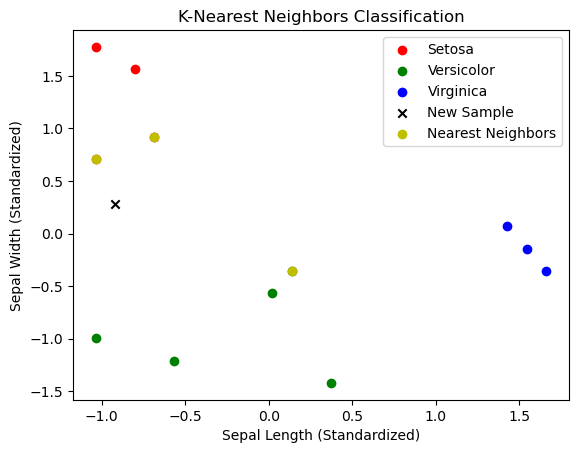

In [26]:
import matplotlib.pyplot as plt

# Plot the training data points
plt.scatter(x_train[y_train == 'Setosa'][:, 0], x_train[y_train == 'Setosa'][:, 1], c='r', label='Setosa')
plt.scatter(x_train[y_train == 'Versicolor'][:, 0], x_train[y_train == 'Versicolor'][:, 1], c='g', label='Versicolor')
plt.scatter(x_train[y_train == 'Virginica'][:, 0], x_train[y_train == 'Virginica'][:, 1], c='b', label='Virginica')

# Plot the new sample point
plt.scatter(new_flower[:, 0], new_flower[:, 1], c='k', marker='x', label='New Sample')

# Plot the nearest neighbors
plt.scatter(x_train[indices[0], 0], x_train[indices[0], 1], c='y', marker='o', label='Nearest Neighbors')

plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('K-Nearest Neighbors Classification')
plt.legend()
plt.show()
